In [56]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Read in the saved objpoints and imgpoints
dist_pickle = pickle.load( open( "wide_dist_pickle.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
print ( " mtx.shape = " + str(mtx.shape) )

 mtx.shape = (3, 3)


In [72]:
# Read in an image
img = cv2.imread('test_image.jpg')
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [98]:
1
# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undst = cv2.undistort(img, mtx, dist, None, mtx)
    img_size = (undst.shape[1], undst.shape[0])
    # 2) Convert to grayscale
#     gray = cv2.cvtColor(undst, cv2.COLOR_BGR2GRAY)
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(undst, (nx, ny), None)

    # 4) If corners found: 
    if ret == True:
    # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undst, (nx, ny), corners, ret)
        offset = 100 # offset for dst points    img_size = (undst.shape[1], undst.shape[0])
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
            # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        warped = cv2.warpPerspective(undst, M, img_size)
        # e) use cv2.warpPerspective() to warp your image to a top-down view
    #delete the next two lines
    src = [[0,0],
           [10,10],
           [0,0],
           [0,0],
          ]
    
#    M = cv2.getPerspectiveTransform()
    M = None
    return warped #, M

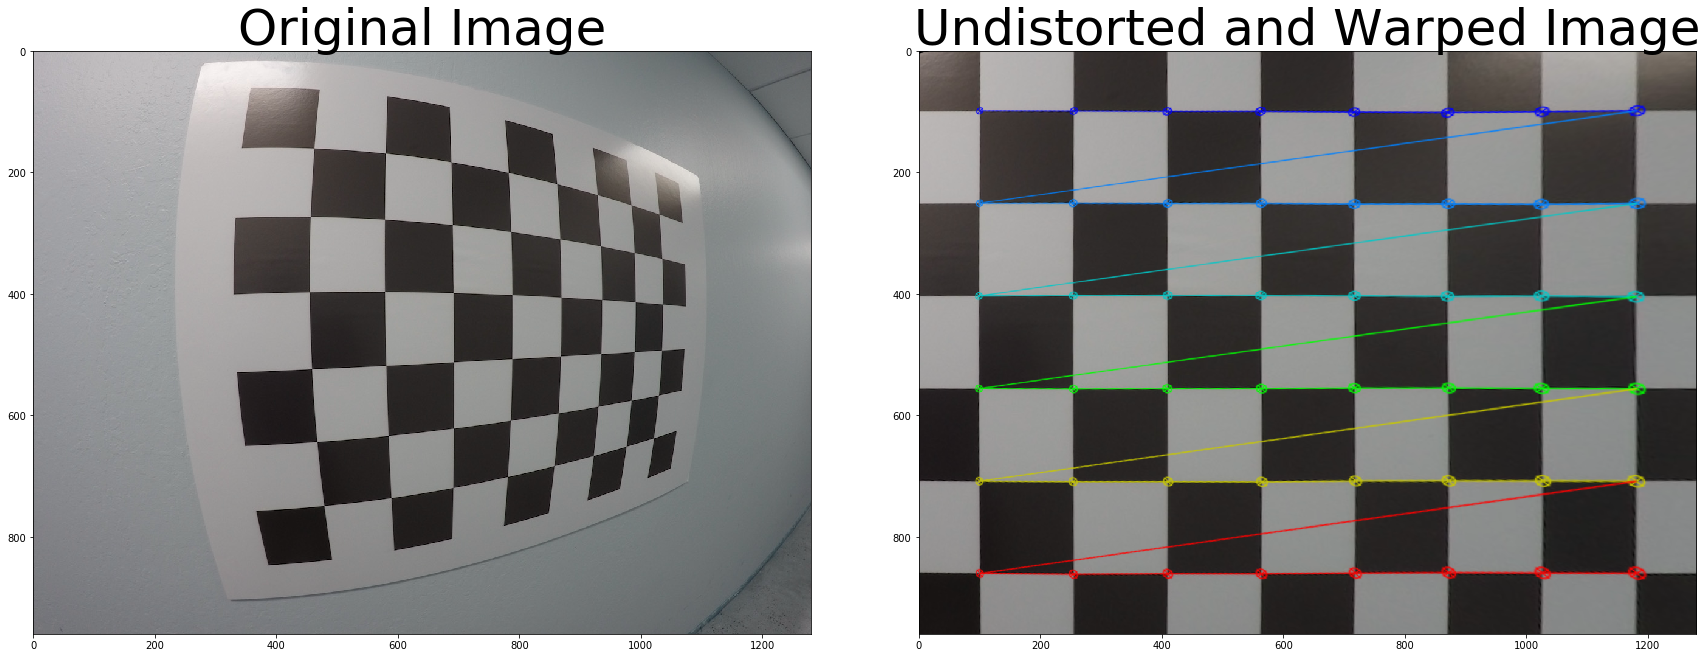

In [99]:
# top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
top_down = corners_unwarp(img, nx, ny, mtx, dist)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(img)
ax1.set_title('Original Image', fontsize=50)

ax2.imshow(top_down)
ax2.set_title('Undistorted and Warped Image', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
plt.show()